# RMSE and ACC plots for the CREDIT arXiv paper

In [1]:
import os
import sys
import yaml
import numpy as np
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu

In [3]:
config_name = os.path.realpath('plot_config_template.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [4]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# import matplotlib.colors as colors
# import matplotlib.patches as patches
# from matplotlib.collections import PatchCollection

# from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [5]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = conf['figure']['keys']['dpi']
else:
    dpi_ = 75

In [6]:
PLOT_data = np.load(conf['data']['save_loc'] + 'scores_CREDIT_arXiv_2024.npy', allow_pickle=True)[()]

In [10]:
PLOT_data.keys()

dict_keys(['RMSE_wxformer_U500_mean', 'ACC_wxformer_U500_mean', 'RMSE_wxformer_U500_95p', 'ACC_wxformer_U500_95p', 'RMSE_wxformer_U500_05p', 'ACC_wxformer_U500_05p', 'RMSE_IFS_U500_mean', 'ACC_IFS_U500_mean', 'RMSE_IFS_U500_95p', 'ACC_IFS_U500_95p', 'RMSE_IFS_U500_05p', 'ACC_IFS_U500_05p', 'RMSE_wxformer_V500_mean', 'ACC_wxformer_V500_mean', 'RMSE_wxformer_V500_95p', 'ACC_wxformer_V500_95p', 'RMSE_wxformer_V500_05p', 'ACC_wxformer_V500_05p', 'RMSE_IFS_V500_mean', 'ACC_IFS_V500_mean', 'RMSE_IFS_V500_95p', 'ACC_IFS_V500_95p', 'RMSE_IFS_V500_05p', 'ACC_IFS_V500_05p', 'RMSE_wxformer_T500_mean', 'ACC_wxformer_T500_mean', 'RMSE_wxformer_T500_95p', 'ACC_wxformer_T500_95p', 'RMSE_wxformer_T500_05p', 'ACC_wxformer_T500_05p', 'RMSE_IFS_T500_mean', 'ACC_IFS_T500_mean', 'RMSE_IFS_T500_95p', 'ACC_IFS_T500_95p', 'RMSE_IFS_T500_05p', 'ACC_IFS_T500_05p', 'RMSE_wxformer_Q500_mean', 'ACC_wxformer_Q500_mean', 'RMSE_wxformer_Q500_95p', 'ACC_wxformer_Q500_95p', 'RMSE_wxformer_Q500_05p', 'ACC_wxformer_Q500_

In [7]:
# colors
red0 = [1.0, 0.09803922, 0.09803922]
red1 = [1.0, 206/255, 204/255]
blue0 = [0.11372549, 0.0, 1.0]
blue1 = [218/255, 232/255, 1.0]
colors_main = [red0, blue0]
colors_sub = [red1, blue1]

line_keys = {}
line_keys['wxformer'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[0], 'label': ''}
line_keys['IFS'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[1], 'label': ''}

fill_keys = {}
fill_keys['wxformer'] = {'facecolor': colors_sub[0], 'alpha': 0.75, 'zorder': 1}
fill_keys['IFS'] = {'facecolor': colors_sub[1], 'alpha': 0.75, 'zorder': 1}

LEADs = np.arange(6, 240+6, 6)
LEAD_ticks = np.arange(0, 240+6, 6)[::8]

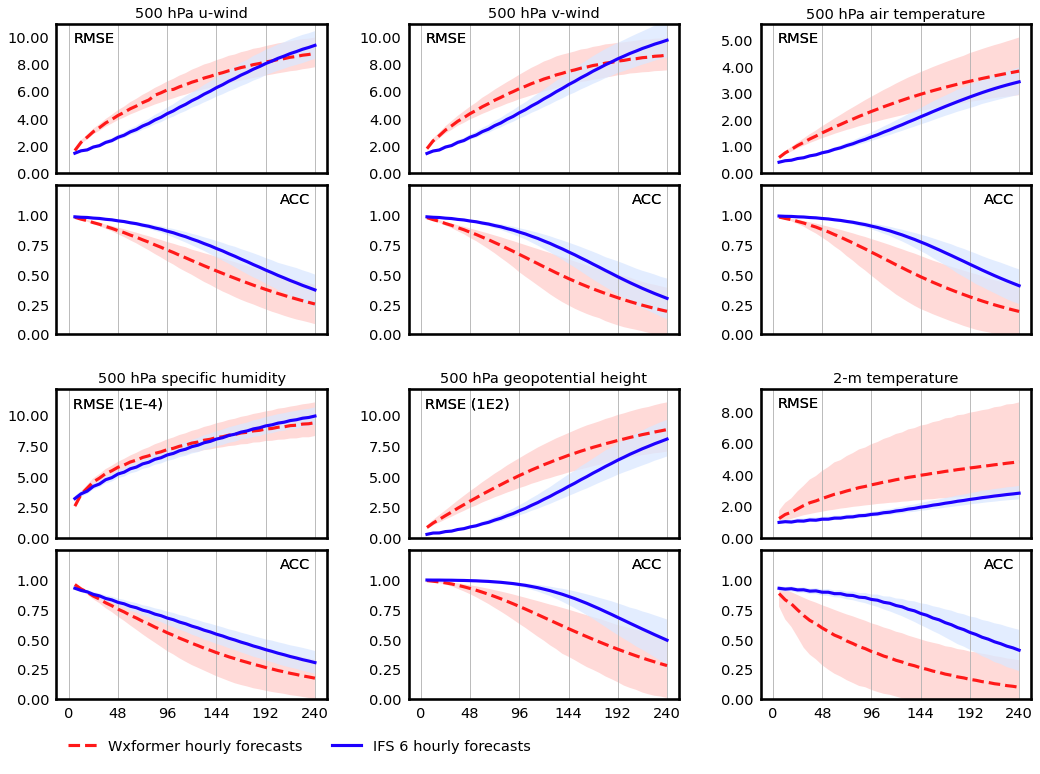

In [8]:
model_names = ['wxformer', 'IFS']
varnames_plot = ['U500', 'V500', 'T500', 'Q500', 'Z500', 't2m']
var_scales = [1.0, 1.0, 1.0, 1e4, 1e-2, 1]
var_scale_strs = ['1', '1', '1', '1E-4', '1E2', '1']

titles = ['500 hPa u-wind', 
          '500 hPa v-wind', 
          '500 hPa air temperature', 
          '500 hPa specific humidity', 
          '500 hPa geopotential height', 
          '2-m temperature']

legned_labels = ['Wxformer hourly forecasts', 'IFS 6 hourly forecasts']

fig = plt.figure(figsize=(13, 9), dpi=dpi_)
gs = gridspec.GridSpec(5, 5, height_ratios=[1, 1, 0.2, 1, 1], width_ratios=[1, 0.3, 1, 0.3, 1])

handles = []

ind_x = [0, 1, 3, 4]
ind_y = [0, 2, 4]

#AX = []
AX = np.zeros((4, 3)).tolist()
AX_flat = []
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        AX[ix][iy] = plt.subplot(gs[ix_gs, iy_gs])
        AX_flat.append(plt.subplot(gs[ix_gs, iy_gs]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0.1, wspace=0.0)

for ax in AX_flat:
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(labelleft=True)
    ax.set_xticks(LEAD_ticks)
    ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
    ax.xaxis.grid(False)
    ax.grid(':', axis='x')
    #ax.grid(':', axis='y')

for iy in range(3):
    AX[-1][iy].tick_params(labelbottom=True)
    AX[-1][iy].set_xticklabels(LEAD_ticks)

# ACC y-axis
for ix in [1, 3]:
    for iy in range(3):
        AX[ix][iy].set_ylim([0.0, 1.25])
        AX[ix][iy].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

# RMSE y-axis
for ix in [0, 2]:
    for iy in range(3):
        AX[ix][iy].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        #AX[ix][iy].ticklabel_format(axis='y', scilimits=[0, 0])
        AX[ix][iy].locator_params(axis='y', nbins=6)
        
        
for iy, var in enumerate(varnames_plot):
    for i_model, model_name in enumerate(model_names):

        # ====================================== #
        # panel indexing
        iy_ax = iy
        ix_ax = 0 # select top 3 or bottom 3
        if iy > 2:
            iy_ax = iy_ax - 3
            ix_ax = 2
            
        # --------------------------------------------------------------------------- #
        # RMSE
        
        f = var_scales[iy] # get the scale to plot
        
        AX[0+ix_ax][iy_ax].plot(LEADs, 
                                f*PLOT_data['RMSE_{}_{}_mean'.format(model_name, var)], 
                                **line_keys[model_name])

        # # 95th CIs
        AX[0+ix_ax][iy_ax].fill_between(LEADs, 
                                        f*PLOT_data['RMSE_{}_{}_95p'.format(model_name, var)],
                                        f*PLOT_data['RMSE_{}_{}_05p'.format(model_name, var)],
                                        **fill_keys[model_name])
        
        if f == 1:
            AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE', ha='left', va='top', 
                                    fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
        else:
            AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE ({})'.format(var_scale_strs[iy]), ha='left', va='top', 
                                    fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
        
        # # set ylim here to match the max RMSE vals
        if i_model == 0:
            AX[0+ix_ax][iy_ax].set_ylim([0, 1.1*np.max(f*PLOT_data['RMSE_{}_{}_95p'.format(model_name, var)])])

        # --------------------------------------------------------------------------- #
        # ACC
        AX[1+ix_ax][iy_ax].plot(LEADs, 
                                PLOT_data['ACC_{}_{}_mean'.format(model_name, var)], 
                                **line_keys[model_name])

        AX[1+ix_ax][iy_ax].fill_between(LEADs, 
                                        PLOT_data['ACC_{}_{}_95p'.format(model_name, var)],
                                        PLOT_data['ACC_{}_{}_05p'.format(model_name, var)],
                                        **fill_keys[model_name])
        
        AX[1+ix_ax][iy_ax].text(0.9375, 0.95, 'ACC', ha='right', va='top', 
                                fontsize=14, transform=AX[1+ix_ax][iy_ax].transAxes)

        # title
        AX[0+ix_ax][iy_ax].set_title(titles[iy], fontsize=14)

handle_legneds1 = []
handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS']))

ax_lg1 = fig.add_axes([0.0, -0.1, 0.5, 0.06])
LG1 = ax_lg1.legend(handle_legneds1, legned_labels, bbox_to_anchor=(1, 1), ncol=2, prop={'size':14})
LG1 = gu.lg_box(LG1)

ax_lg1.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(conf['figure']['save_loc']+'CREDIT_arXiv_fig1.png', format='png', **conf['figure']['keys'])

In [16]:
import os
import yaml
import glob
import tqdm
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [17]:
filer = '/glade/derecho/scratch/schreck/repos/miles-credit/results/wxformer/quarter/large_multi/weights/'

In [18]:
hours = [1, 12, 24, 48, 72, 120]

In [19]:
def read_csv_file(file_path):
    """Read a CSV file and return the DataFrame."""
    return pd.read_csv(file_path)

# Dictionary to store data for each hour
df_dict = {}

# Loop through each hour and load the data in parallel
for hour in hours:
    file_pattern = os.path.join(filer, str(hour), 'forecasts', 'metrics', '*.csv')
    csv_files = glob.glob(file_pattern)

    # Initialize the tqdm progress bar
    with Pool(8) as pool:
        data_frames = list(tqdm.tqdm(pool.map(read_csv_file, csv_files), total=len(csv_files)))

    # Concatenate the DataFrames and store them in the dictionary
    df_dict[hour] = pd.concat(data_frames[:365], ignore_index=True)


100%|██████████| 384/384 [00:00<00:00, 2049125.62it/s]


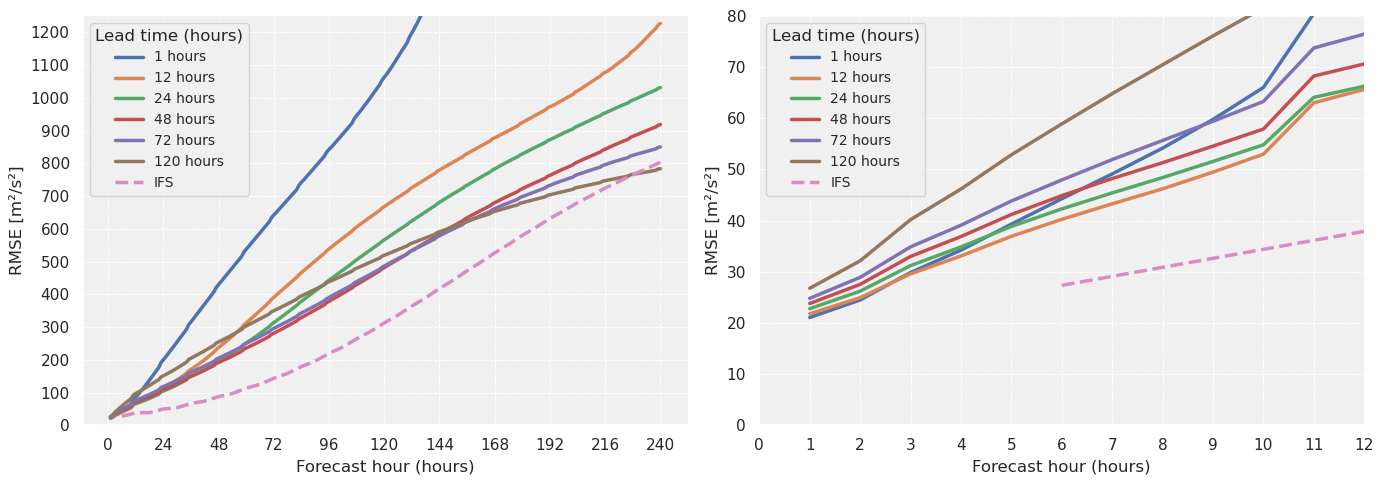

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style for better aesthetics
sns.set(style="darkgrid", rc={"axes.facecolor": "#f0f0f0"})

# Create a new figure for the plots with 2 columns and 1 row
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loop through each hour, read the corresponding CSV file, and plot the data in the first subplot
# for k in hours:
#     filename = filer + str(k) + '/forecasts/metrics/metrics2020-06-01T00Z.csv'
#     df = pd.read_csv(filename)
# Get all CSV files in the directory
# Loop through each hour, read the corresponding CSV file, and plot the data in the first subplot
all_data = pd.DataFrame()
for k in hours:
    df = df_dict[k].groupby('forecast_hour').mean().reset_index()
    axes[0].plot(df["forecast_hour"], df["rmse_Z500"], label=f'{k} hours', linewidth=2.5)
    axes[1].plot(df["forecast_hour"], df["rmse_Z500"], label=f'{k} hours', linewidth=2.5)
axes[0].plot(LEADs, PLOT_data['RMSE_IFS_Z500_mean'], linewidth=2.5, label = "IFS", ls = '--')
axes[1].plot(LEADs, PLOT_data['RMSE_IFS_Z500_mean'], linewidth=2.5, label = "IFS", ls = '--')

# Add legend with the hours
axes[0].legend(title='Lead time (hours)', fontsize=10, title_fontsize='12')

# Add titles and labels with units
axes[0].set_xlabel('Forecast hour (hours)', fontsize=12)
axes[0].set_ylabel('RMSE [m²/s²]', fontsize=12)

# Customize ticks
axes[0].set_xticks(range(0, df["forecast_hour"].max() + 1, 24))
axes[0].set_yticks(range(0, 1500 + 100, 100))
axes[0].set_ylim([0, 1250])

# Add gridlines for better readability
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7, color='white')

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Add legend with the hours
axes[1].legend(title='Lead time (hours)', fontsize=10, title_fontsize='12')

# Add titles and labels with units
axes[1].set_xlabel('Forecast hour (hours)', fontsize=12)
axes[1].set_ylabel('RMSE [m²/s²]', fontsize=12)

# Customize ticks for the second subplot
axes[1].set_xticks(range(0, 25, 1))
axes[1].set_yticks(range(0, 210, 10))
axes[1].set_xlim([0, 12])
axes[1].set_ylim([0, 80])

# Add gridlines for better readability
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7, color='white')

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
# PLOT_data.keys()

In [32]:
# PLOT_data['RMSE_IFS_Z500_mean']

In [ ]:
# PLOT_data['RMSE_wxformer_Z500_mean']